# Projeto Machine Learning - Predi√ß√£o de Acidentes A√©reos Fatais

## Sum√°rio do Projeto: Predi√ß√£o de Acidentes A√©reos Fatais

### 1. Introdu√ß√£o e Objetivos
#### 1.1. Contexto do Problema
#### 1.2. Objetivos da An√°lise
#### 1.3. Dicion√°rio de Vari√°veis

### 2. Configura√ß√£o do Ambiente

### 3. Carga e An√°lise Inicial dos Dados

### 4. Limpeza e Pr√©-Processamento dos Dados
#### 4.1. Remo√ß√£o de Duplicatas
#### 4.2. Tratamento de Tipos de Dados
#### 4.3. Tratamento de Valores Ausentes (Nulos)

### 5. An√°lise Explorat√≥ria de Dados (EDA)
#### 5.1. Sele√ß√£o de Features e Visualiza√ß√£o da Distribui√ß√£o da Vari√°vel Target
#### 5.2. Estados com Mais Acidentes Fatais
#### 5.3. Tend√™ncia da Taxa de Fatalidade

### 6. Engenharia e Sele√ß√£o de Features
#### 6.1. Divis√£o dos Dados (Treino/Teste)
#### 6.2. Separa√ß√£o de Features por Tipo
#### 6.3. Encoding e Normaliza√ß√£o

### 7. Modelagem
#### 7.1. Balanceamento de Classes com SMOTE
#### 7.2. Treinamento dos Modelos
#### 7.3. Predi√ß√µes e M√©tricas Iniciais
#### 7.4. Valida√ß√£o Cruzada

### 8. Valida√ß√£o e Compara√ß√£o dos Modelos
#### 8.1. Matrizes de Confus√£o
#### 8.2. Curva ROC e AUC
#### 8.3. An√°lise dos Resultados
#### 8.4. Import√¢ncia das Features
#### 8.5. Otimiza√ß√£o do Threshold

### 9. Regress√£o Log√≠stica - Teste Final
#### 9.1. Matriz de Confus√£o (Threshold Otimizado)
#### 9.2. Curva ROC no Teste Real
#### 9.3. Curva Precis√£o x Recall

---

## Equipe do Projeto

| RA ¬† ¬† ¬†| Nome ¬† ¬† ¬† ¬† ¬† ¬† ¬† ¬† |
|---------|----------------------|
| 1134868 | √Åbner Panazollo ¬† ¬† ¬†|
| 1134433 | Ariel Diefenthaeler ¬†|
| 1134933 | Eduardo Sichelero ¬† ¬†|
| 1134890 | Gabriel Duarte ¬† ¬† ¬† |
| 1135384 | Gabriel Onofre ¬† ¬† ¬† |
| 1134821 | Vitor Quadros ¬† ¬† ¬† ¬†|

---

## 1. Introdu√ß√£o e Objetivos

### 1.1 Contexto do Problema

A seguran√ßa a√©rea √© uma preocupa√ß√£o fundamental no setor de avia√ß√£o. Identificar padr√µes que levam a acidentes fatais pode ajudar autoridades, companhias a√©reas e √≥rg√£os reguladores a tomar medidas preventivas e salvar vidas.

Este projeto foca em analisar dados hist√≥ricos de acidentes a√©reos no Brasil (CENIPA) para construir um modelo preditivo capaz de determinar se um acidente ser√° fatal ou n√£o-fatal com base em caracter√≠sticas do voo, aeronave e condi√ß√µes do acidente.

### 1.2 Objetivos da An√°lise

- **1.** **An√°lise Explorat√≥ria**: Entender os padr√µes de acidentes a√©reos, identificando distribui√ß√µes geogr√°ficas, temporais e caracter√≠sticas das aeronaves envolvidas.
- **2.** **Engenharia de Features**: Criar vari√°veis que ajudem a identificar o risco de fatalidade, incluindo features temporais e categ√≥ricas.
- **3.** **Modelagem Preditiva**: Treinar e avaliar diferentes modelos de Machine Learning (Baseline, Regress√£o Log√≠stica e √Årvore de Decis√£o) para prever a probabilidade de um acidente ser fatal.
- **4.** **Valida√ß√£o**: Avaliar os modelos usando m√∫ltiplas m√©tricas (Acur√°cia, Precis√£o, Recall, F1-Score, AUC-ROC) e otimizar o threshold de decis√£o.

### 1.3 Dicion√°rio de Vari√°veis

O conjunto de dados cont√©m informa√ß√µes sobre acidentes a√©reos no Brasil. As principais vari√°veis incluem:

**Vari√°veis Geogr√°ficas:**
- **latitude/longitude**: Coordenadas do local do acidente
- **regiao**: Regi√£o do Brasil (Norte, Sul, Nordeste, etc.)
- **uf**: Unidade Federativa

**Vari√°veis Temporais:**
- **dt_ocorrencia**: Data do acidente
- **hr_ocorrencia**: Hora do acidente
- **ano_ocorrencia**: Ano extra√≠do da data
- **mes_ocorrencia**: M√™s extra√≠do da data

**Caracter√≠sticas da Aeronave:**
- **modelo_aeronave**: Modelo da aeronave
- **nome_fabricante**: Fabricante da aeronave
- **cat_aeronave**: Categoria da aeronave
- **peso_max_decolagem**: Peso m√°ximo de decolagem
- **numero_assentos**: N√∫mero de assentos

**Vari√°veis Operacionais:**
- **fase_operacao**: Fase do voo (decolagem, cruzeiro, pouso, etc.)
- **op_padronizado**: Opera√ß√£o padronizada

**Vari√°vel Target:**
- **les_fatais_trip**: 1 = Fatal, 0 = N√£o Fatal

## 2. Configura√ß√£o do Ambiente

Nesta se√ß√£o, importamos todas as bibliotecas necess√°rias para a an√°lise, pr√©-processamento e modelagem.

In [357]:
# Bibliotecas para manipula√ß√£o e an√°lise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualiza√ß√£o de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Machine Learning e pr√©-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

# Balanceamento de classes
from imblearn.over_sampling import SMOTE

# Configura√ß√µes de visualiza√ß√£o
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
%matplotlib inline

print("‚úì Bibliotecas importadas com sucesso!")

‚úì Bibliotecas importadas com sucesso!


## 3. Carga e An√°lise Inicial dos Dados

Carregamos os dados de treino e realizamos uma verifica√ß√£o inicial para entender sua estrutura, tipos de dados e a presen√ßa de valores ausentes.

In [358]:
# Carregamento do dataset de treino
df = pd.read_csv("docs/treino.csv")

print(f"‚úì Dados carregados com sucesso!")
print(f"Dimens√µes: {df.shape[0]} linhas x {df.shape[1]} colunas")

‚úì Dados carregados com sucesso!
Dimens√µes: 536 linhas x 14 colunas


In [359]:
# Amostra dos dados
df.head()

op_padronizado dt_ocorrencia hr_ocorrencia  \
0             AEROAGRICOLA CHAPADAO LTDA    21/12/1999           NaN   
1           RONDON AVIACAO AGRICOLA LTDA    06/01/2000           NaN   
2  SAPA SERV. AEREO DE PROTECAO AGRICOLA    22/02/2000           NaN   
3             AERO AGRICOLA CAICARA LTDA    10/05/2000           NaN   
4          AVIACAO AGRICOLA RECREIO LTDA    09/11/2000           NaN   

              uf        regiao latitude longitude cat_aeronave fase_operacao  \
0             SP       Sudeste      NaN       NaN          S05           NaN   
1             MT  Centro-Oeste      NaN       NaN          S05           NaN   
2             RS           Sul      NaN       NaN          S05           NaN   
3             SP       Sudeste      NaN       NaN          S05           NaN   
4  Indeterminado           NaN      NaN       NaN          TPP           NaN   

  modelo_aeronave  peso_max_decolagem  numero_assentos    nome_fabricante  \
0       PA-25-235              1315.0              1.0     PIPER AIRCRAFT   
1         EMB-201              1800.0              1.0              NEIVA   
2           A188B              1497.0              1.0    CESSNA AIRCRAFT   
3       PA-25-260              1315.0              1.0     PIPER AIRCRAFT   
4           369HS              1157.0              5.0  HUGHES HELICOPTER   

   les_fatais_trip  
0                0  
1                0  
2                0  
3                0  
4                0

An√°lise Inicial:
- O dataset possui m√∫ltiplas linhas e colunas com informa√ß√µes sobre acidentes a√©reos
- H√° colunas geogr√°ficas (latitude, longitude, regiao, uf)
- Colunas temporais (dt_ocorrencia, hr_ocorrencia)
- Caracter√≠sticas das aeronaves (modelo, fabricante, peso, assentos)
- Vari√°vel target: les_fatais_trip (0 = N√£o Fatal, 1 = Fatal)
- Presen√ßa de valores nulos que precisar√£o de tratamento

In [360]:
# Verificando a estrutura e os tipos de dados do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   op_padronizado      534 non-null    object 
 1   dt_ocorrencia       536 non-null    object 
 2   hr_ocorrencia       365 non-null    object 
 3   uf                  536 non-null    object 
 4   regiao              473 non-null    object 
 5   latitude            382 non-null    object 
 6   longitude           382 non-null    object 
 7   cat_aeronave        536 non-null    object 
 8   fase_operacao       393 non-null    object 
 9   modelo_aeronave     533 non-null    object 
 10  peso_max_decolagem  534 non-null    float64
 11  numero_assentos     534 non-null    float64
 12  nome_fabricante     533 non-null    object 
 13  les_fatais_trip     536 non-null    int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 58.8+ KB


## 4. Limpeza e Pr√©-Processamento dos Dados

Esta etapa √© crucial para garantir a qualidade dos dados que alimentar√£o o modelo.

### 4.1 Remo√ß√£o de Duplicatas

Removemos registros duplicados que podem distorcer a an√°lise.

In [361]:
# Verificando informa√ß√µes antes da remo√ß√£o
print("Antes da remo√ß√£o de duplicatas:")
df.info()

Antes da remo√ß√£o de duplicatas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   op_padronizado      534 non-null    object 
 1   dt_ocorrencia       536 non-null    object 
 2   hr_ocorrencia       365 non-null    object 
 3   uf                  536 non-null    object 
 4   regiao              473 non-null    object 
 5   latitude            382 non-null    object 
 6   longitude           382 non-null    object 
 7   cat_aeronave        536 non-null    object 
 8   fase_operacao       393 non-null    object 
 9   modelo_aeronave     533 non-null    object 
 10  peso_max_decolagem  534 non-null    float64
 11  numero_assentos     534 non-null    float64
 12  nome_fabricante     533 non-null    object 
 13  les_fatais_trip     536 non-null    int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 58.8+ KB


In [362]:
# Removendo duplicatas
linhas_antes = len(df)
df = df.drop_duplicates().reset_index(drop=True)
linhas_depois = len(df)

print(f"Linhas antes: {linhas_antes}")
print(f"Linhas depois: {linhas_depois}")
print(f"‚úì Duplicatas removidas: {linhas_antes - linhas_depois}")

Linhas antes: 536
Linhas depois: 510
‚úì Duplicatas removidas: 26


### 4.2 Tratamento de Tipos de Dados

Convertemos colunas para os tipos apropriados (datas, num√©ricos, etc.).

In [363]:
# Converter latitude e longitude para float
df['latitude'] = df['latitude'].astype(str).str.replace(',', '.').astype(float)
df['longitude'] = df['longitude'].astype(str).str.replace(',', '.').astype(float)

# Converter data
df['dt_ocorrencia'] = pd.to_datetime(df['dt_ocorrencia'], format='%d/%m/%Y', errors='coerce')

print("Convers√µes realizadas!")
df.info()

Convers√µes realizadas!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   op_padronizado      508 non-null    object        
 1   dt_ocorrencia       510 non-null    datetime64[ns]
 2   hr_ocorrencia       340 non-null    object        
 3   uf                  510 non-null    object        
 4   regiao              447 non-null    object        
 5   latitude            358 non-null    float64       
 6   longitude           358 non-null    float64       
 7   cat_aeronave        510 non-null    object        
 8   fase_operacao       367 non-null    object        
 9   modelo_aeronave     507 non-null    object        
 10  peso_max_decolagem  508 non-null    float64       
 11  numero_assentos     508 non-null    float64       
 12  nome_fabricante     507 non-null    object        
 13  les_fatais_trip     510 no

In [364]:
# Verificar valores nulos
print(df.isnull().sum())

op_padronizado          2
dt_ocorrencia           0
hr_ocorrencia         170
uf                      0
regiao                 63
latitude              152
longitude             152
cat_aeronave            0
fase_operacao         143
modelo_aeronave         3
peso_max_decolagem      2
numero_assentos         2
nome_fabricante         3
les_fatais_trip         0
dtype: int64


### 4.3 Tratamento de Valores Ausentes (Nulos)

- **Preenchimento com mediana**: Para colunas num√©ricas
- **Preenchimento com moda**: Para colunas categ√≥ricas
- **Remo√ß√£o de linhas**: Para dados essenciais ausentes

In [365]:
# Criar novas colunas de ano e m√™s
df['ano_ocorrencia'] = df['dt_ocorrencia'].dt.year
df['mes_ocorrencia'] = df['dt_ocorrencia'].dt.month

print("Novas colunas criadas!")
df[['dt_ocorrencia', 'ano_ocorrencia', 'mes_ocorrencia']].head()

Novas colunas criadas!


dt_ocorrencia  ano_ocorrencia  mes_ocorrencia
0    1999-12-21            1999              12
1    2000-01-06            2000               1
2    2000-02-22            2000               2
3    2000-05-10            2000               5
4    2000-11-09            2000              11

In [366]:
# Tratamento dos valores (NaN)

print("\n--- Contagem de valores nulos ANTES do tratamento ---")


# Lista de colunas num√©ricas para imputar com a mediana
colunas_numericas_nan = ['peso_max_decolagem', 'numero_assentos']
for col in colunas_numericas_nan:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)
    print(f"Valores nulos em '{col}' preenchidos com a mediana: {mediana}")

print("-" * 20)

# Lista de colunas categ√≥ricas para imputar com a moda
colunas_categoricas_nan = ['op_padronizado', 'hr_ocorrencia', 'regiao', 'fase_operacao', 'modelo_aeronave', 'nome_fabricante']
for col in colunas_categoricas_nan:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda)
    print(f"Valores nulos em '{col}' preenchidos com a moda: '{moda}'")

print("-" * 20)

# Removendo linhas onde dados essenciais ainda s√£o nulos
print("Removendo linhas onde 'dt_ocorrencia', 'latitude' ou 'longitude' s√£o nulos...")
df.dropna(subset=['dt_ocorrencia', 'latitude', 'longitude'], inplace=True)

print("\n--- Contagem de valores nulos DEPOIS do tratamento ---")
print(df.isnull().sum())


--- Contagem de valores nulos ANTES do tratamento ---
Valores nulos em 'peso_max_decolagem' preenchidos com a mediana: 1800.0
Valores nulos em 'numero_assentos' preenchidos com a mediana: 1.0
--------------------
Valores nulos em 'op_padronizado' preenchidos com a moda: 'AERO AGRICOLA CAICARA LTDA'
Valores nulos em 'hr_ocorrencia' preenchidos com a moda: '10:30:00'
Valores nulos em 'regiao' preenchidos com a moda: 'Sul'
Valores nulos em 'fase_operacao' preenchidos com a moda: 'Especializada'
Valores nulos em 'modelo_aeronave' preenchidos com a moda: 'EMB-202'
Valores nulos em 'nome_fabricante' preenchidos com a moda: 'NEIVA'
--------------------
Removendo linhas onde 'dt_ocorrencia', 'latitude' ou 'longitude' s√£o nulos...

--- Contagem de valores nulos DEPOIS do tratamento ---
op_padronizado        0
dt_ocorrencia         0
hr_ocorrencia         0
uf                    0
regiao                0
latitude              0
longitude             0
cat_aeronave          0
fase_operacao     

## 5. An√°lise Explorat√≥ria de Dados (EDA)

### 5.1 Sele√ß√£o de Features e Visualiza√ß√£o da Distribui√ß√£o da Vari√°vel Target

Features selecionadas: 12
Total de registros: 358

Distribui√ß√£o da vari√°vel target:
les_fatais_trip
0    307
1     51
Name: count, dtype: int64


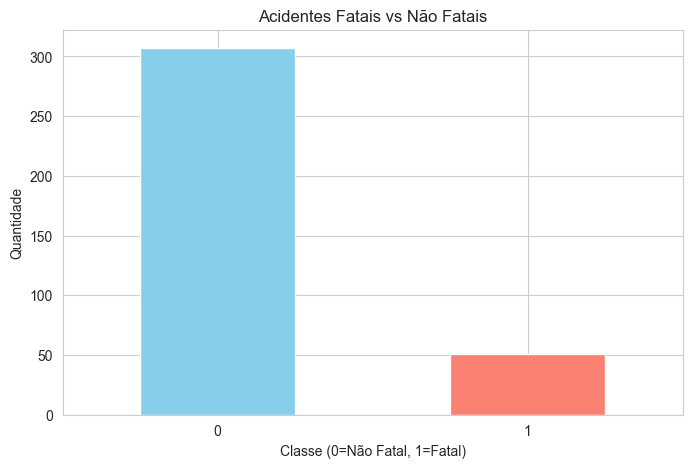

In [367]:
# Selecionar features e target
features = ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos',
            'fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 
            'nome_fabricante', 'ano_ocorrencia', 'mes_ocorrencia']

X = df[features]
y = df['les_fatais_trip']

print(f"Features selecionadas: {X.shape[1]}")
print(f"Total de registros: {X.shape[0]}")

# Verificar balanceamento
print("\nDistribui√ß√£o da vari√°vel target:")
print(y.value_counts())

# Visualizar balanceamento
plt.figure(figsize=(8, 5))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Acidentes Fatais vs N√£o Fatais')
plt.xlabel('Classe (0=N√£o Fatal, 1=Fatal)')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

### 5.2 Estados com mais acidentes fatais

Gerando Gr√°fico: Top 5 UFs com mais Acidentes FATAIS...


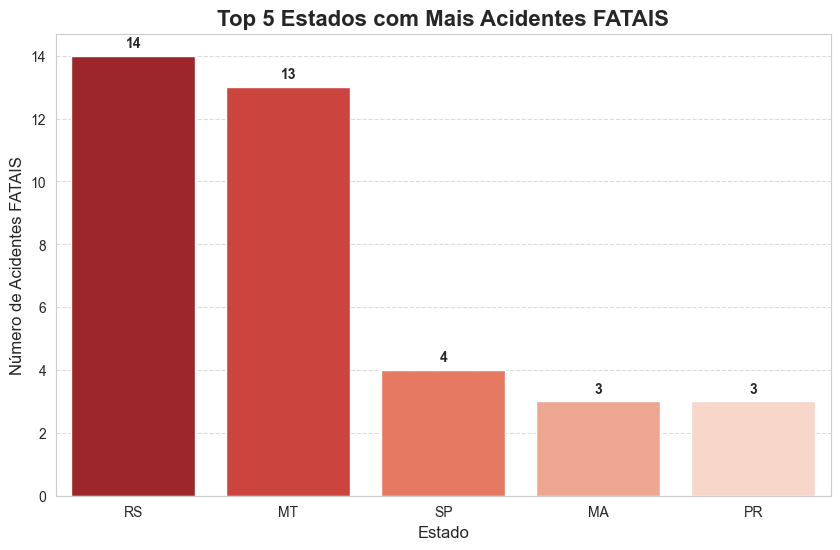

In [368]:
print("Gerando Gr√°fico: Top 5 UFs com mais Acidentes FATAIS...")

# 1. Filtrar o DataFrame para incluir apenas acidentes fatais
# A coluna 'les_fatais_trip' == 1 indica um acidente fatal
df_fatais = df[df['les_fatais_trip'] == 1]

# 2. Contar as ocorr√™ncias por UF (Estado) e pegar as 5 maiores
top_5_ufs_fatais = df_fatais['uf'].value_counts().head(5)

# 3. Criar o gr√°fico de barras
plt.figure(figsize=(10, 6))
barplot_fatais = sns.barplot(
    x=top_5_ufs_fatais.index, 
    y=top_5_ufs_fatais.values, 
    palette='Reds_r',  # Usando uma paleta de vermelhos para destacar "fatais"
    order=top_5_ufs_fatais.index
)

# 4. Adicionar T√≠tulos e R√≥tulos
plt.title('Top 5 Estados com Mais Acidentes FATAIS', fontsize=16, fontweight='bold')
plt.xlabel('Estado', fontsize=12)
plt.ylabel('N√∫mero de Acidentes FATAIS', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Adicionar r√≥tulos de dados (data labels) em cima das barras
for p in barplot_fatais.patches:
    barplot_fatais.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontweight='bold')

# Exibir o gr√°fico
plt.show()



### 5.3 Tend√™ncia da Taxa de Fatalidade

Gerando Gr√°fico: Tend√™ncia da Taxa de Fatalidade...


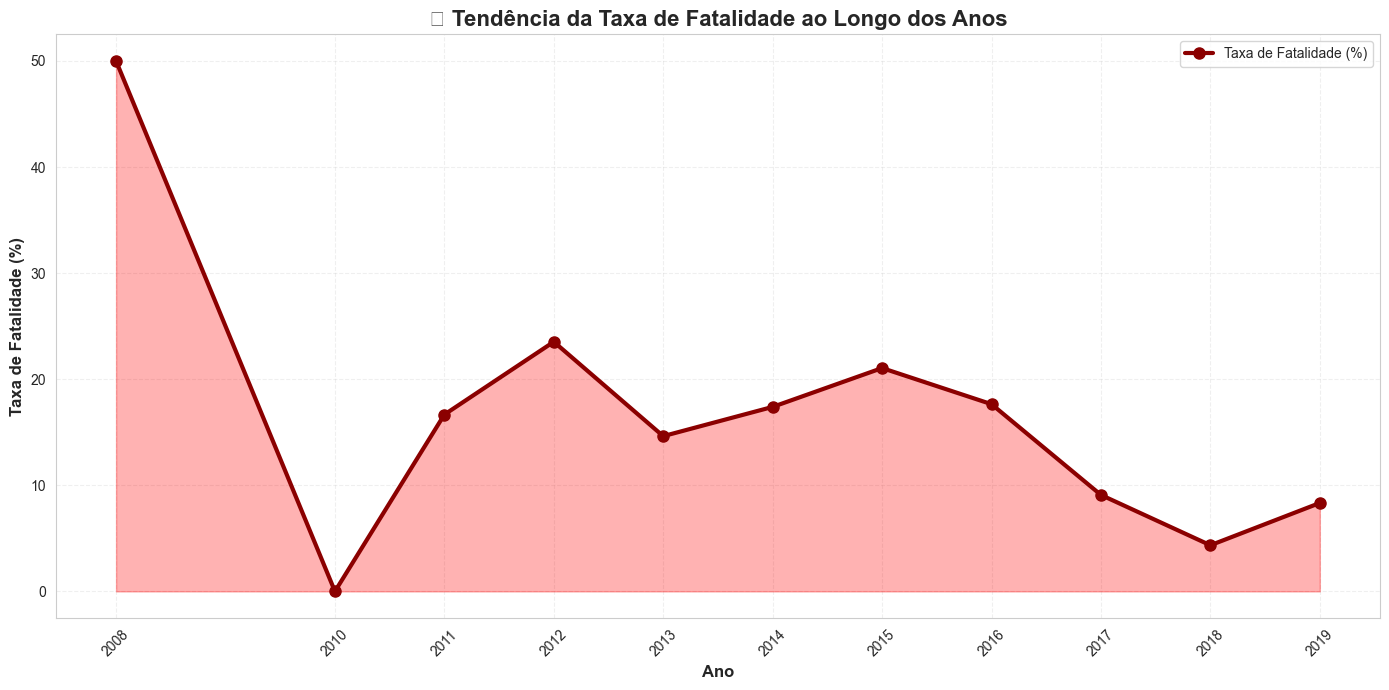

In [369]:

print("Gerando Gr√°fico: Tend√™ncia da Taxa de Fatalidade...")

# 1. Agrupar acidentes fatais (les_fatais_trip == 1) por ano
# Usamos .reindex(df['ano_ocorrencia'].unique()).fillna(0) para garantir que anos sem acidentes fatais apare√ßam como 0
acidentes_fatais_ano = df[df['les_fatais_trip'] == 1].groupby('ano_ocorrencia').size()

# 2. Agrupar TODOS os acidentes por ano
acidentes_totais_ano = df.groupby('ano_ocorrencia').size()

# 3. Calcular a taxa de fatalidade (em %) para cada ano
# .fillna(0) √© usado para anos que n√£o tiveram acidentes fatais
taxa_fatalidade = (acidentes_fatais_ano / acidentes_totais_ano * 100).fillna(0)

# 4. Criar o gr√°fico
plt.figure(figsize=(14, 7)) # Tamanho bom para um gr√°fico de linha
ax = plt.gca() # Pega o eixo atual

# 5. Plotar a linha
ax.plot(taxa_fatalidade.index, taxa_fatalidade.values, marker='o', 
        linewidth=3, markersize=8, color='darkred', label='Taxa de Fatalidade (%)')

# 6. Adicionar a √°rea preenchida abaixo da linha (como no seu exemplo)
ax.fill_between(taxa_fatalidade.index, taxa_fatalidade.values, alpha=0.3, color='red')

# 7. Configurar T√≠tulos e R√≥tulos
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Taxa de Fatalidade (%)', fontsize=12, fontweight='bold')
ax.set_title('üìà Tend√™ncia da Taxa de Fatalidade ao Longo dos Anos', 
              fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')


plt.xticks(taxa_fatalidade.index.astype(int), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## 6. Engenharia e Sele√ß√£o de Features

### 6.1 Divis√£o dos Dados (Treino/Teste)

In [370]:
# Explica√ß√£o do que ta acontecendo aqui: 

#Essa parte ele pega 50% do modelo para previs√£o e tranca 50% para teste, assim o modelo posteriormente vai pegar o restante dos dados 50% e testar se ele vai descobrir se um acidente foi fatal ou n√£o.
# Se ele tiver todas as respostas, ele n√£o vai conseguir prever um acidente "novo", e falhar√° miser√°velmente.

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"Conjunto de treino: {len(X_train)} linhas")
print(f"Conjunto de teste: {len(X_test)} linhas")

Conjunto de treino: 250 linhas
Conjunto de teste: 108 linhas


### 6.2 Separa√ß√£o de Features por Tipo

In [371]:
## Explica√ß√£o do que ta acontecendo aqui:

# O c√≥digo n√£o vai entender as palavras, ent√£o precisa converter pra n√∫meros
# Essa parte s√≥ separa em duas colunas, o restante est√° no 6.3...

# Separar colunas num√©ricas e categ√≥ricas
colunas_numericas = ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos', 
                     'ano_ocorrencia', 'mes_ocorrencia']
colunas_categoricas = ['fase_operacao', 'cat_aeronave', 'regiao', 'uf', 
                       'modelo_aeronave', 'nome_fabricante']

print("Colunas num√©ricas:", colunas_numericas)
print("Colunas categ√≥ricas:", colunas_categoricas)

Colunas num√©ricas: ['latitude', 'longitude', 'peso_max_decolagem', 'numero_assentos', 'ano_ocorrencia', 'mes_ocorrencia']
Colunas categ√≥ricas: ['fase_operacao', 'cat_aeronave', 'regiao', 'uf', 'modelo_aeronave', 'nome_fabricante']


### 6.3 Encoding e Normaliza√ß√£o

In [372]:
# Explica√ß√£o do que ta acontecendo aqui
#Encoding: Converter as colunas categ√≥ricas, que s√£o texto (ex: "Sul", "SP"), em um formato num√©rico (usando pd.get_dummies) que o modelo consiga processar.
#Normaliza√ß√£o: Colocar todas as features num√©ricas na mesma escala (usando StandardScaler) para que nenhuma vari√°vel domine o modelo apenas por ter n√∫meros maiores.


# Codificar vari√°veis categ√≥ricas com get_dummies
X_train_encoded = pd.get_dummies(X_train, columns=colunas_categoricas)
X_test_encoded = pd.get_dummies(X_test, columns=colunas_categoricas)

# Garantir que treino e teste tenham as mesmas colunas
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

print(f"Features ap√≥s encoding: {X_train_encoded.shape[1]}")

# Normalizar features num√©ricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

print("Pr√©-processamento conclu√≠do!")

Features ap√≥s encoding: 82
Pr√©-processamento conclu√≠do!


## 7. Modelagem

### 7.1 Balanceamento de Classes com SMOTE

Antes do SMOTE:
Classe 0 (N√£o Fatal): 214
Classe 1 (Fatal): 36

Depois do SMOTE:
Classe 0 (N√£o Fatal): 214
Classe 1 (Fatal): 214


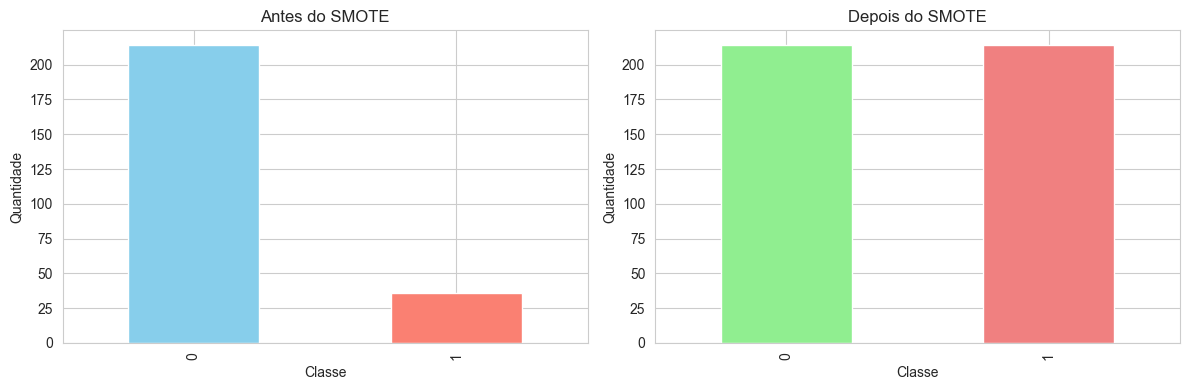

In [373]:
## Explica√ß√£o do que ta acontecendo aqui

## Os dados de treino est√£o muito desbalanceados, existem muitos acidentes "N√£o fatais" para poucos acidentes "Fatais"

## Oq o SMOTE faz? --- Ele corrige esse desbalancemanento de classes

## Como?? utilizando o SMOTE(random_state=42)), que "cria" novos exemplos sint√©ticos da classe minorit√°ria (acidentes fatais).

# Aplicar SMOTE para balancear as classes
print("Antes do SMOTE:")
print(f"Classe 0 (N√£o Fatal): {sum(y_train == 0)}")
print(f"Classe 1 (Fatal): {sum(y_train == 1)}")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nDepois do SMOTE:")
print(f"Classe 0 (N√£o Fatal): {sum(y_train_balanced == 0)}")
print(f"Classe 1 (Fatal): {sum(y_train_balanced == 1)}")

# Visualizar balanceamento
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

pd.Series(y_train).value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Antes do SMOTE')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Quantidade')

pd.Series(y_train_balanced).value_counts().plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightcoral'])
axes[1].set_title('Depois do SMOTE')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()

### 7.2 Treinamento dos Modelos

Treinamos tr√™s modelos para compara√ß√£o:
- **Baseline (Dummy)**: Modelo simples de refer√™ncia
- **Regress√£o Log√≠stica**: Modelo linear com dados balanceados
- **√Årvore de Decis√£o**: Modelo n√£o-linear

In [374]:
## Aqui ele faz a mesma coisa

# 1. Modelo Baseline (Dummy) - N√£o faz nada, s√≥ prev√™ classes mais frequentes tipo "acidentes fatais" e acusa acur√°cia enganosa
modelo_baseline = DummyClassifier(strategy='most_frequent', random_state=42)
modelo_baseline.fit(X_train_scaled, y_train)

# 2. Regress√£o Log√≠stica com dados balanceados -- Balancemanto principal, com a inclus√£o do Smote
modelo_logistica = LogisticRegression(random_state=42, max_iter=1000)
modelo_logistica.fit(X_train_balanced, y_train_balanced)

# 3. √Årvore de Decis√£o -- Balanceamento original sem os dados do Smote 
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train_scaled, y_train)

# 4. Random Forest -- Utiliza dados balanceados com SMOTE
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf.fit(X_train_balanced, y_train_balanced)

# 5. Rede Neural (MLP) -- Utiliza dados balanceados com SMOTE
from sklearn.neural_network import MLPClassifier
modelo_nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
modelo_nn.fit(X_train_balanced, y_train_balanced)

print("Modelos treinados com sucesso!")
print("Total de modelos: 5 (Baseline, Regressao Logistica, Arvore de Decisao, Random Forest, Rede Neural)")

Modelos treinados com sucesso!
Total de modelos: 5 (Baseline, Regressao Logistica, Arvore de Decisao, Random Forest, Rede Neural)


### 7.3 Predi√ß√µes e M√©tricas Iniciais

In [375]:
## Explica√ß√£o do que ta acontecendo aqui

## Aqui ele est√° fazendo a prova real, ele est√° pegando o modelo treinando e jogando mais dados para ele verificar


# Fazer predi√ß√µes dos 5 modelos
y_pred_baseline = modelo_baseline.predict(X_test_scaled)
y_pred_logistica = modelo_logistica.predict(X_test_scaled)
y_pred_arvore = modelo_arvore.predict(X_test_scaled)
y_pred_rf = modelo_rf.predict(X_test_scaled)
y_pred_nn = modelo_nn.predict(X_test_scaled)

# Calcular m√©tricas para cada modelo
modelos = ['Baseline', 'Regress√£o Log√≠stica', '√Årvore de Decis√£o', 
           'Random Forest', 'Rede Neural (MLP)']
predicoes = [y_pred_baseline, y_pred_logistica, y_pred_arvore, 
             y_pred_rf, y_pred_nn]

print("=" * 60)
print("RESULTADOS DOS MODELOS")
print("=" * 60)

for nome, y_pred in zip(modelos, predicoes):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"\n{nome}:")
    print(f"  Acur√°cia:  {acc:.4f}")
    print(f"  Precis√£o:  {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

print("=" * 60)

# Identificar melhor modelo
metricas_dict = {
    'Modelo': modelos,
    'F1-Score': [f1_score(y_test, y_pred, zero_division=0) for y_pred in predicoes]
}
df_comparacao = pd.DataFrame(metricas_dict)
melhor_idx = df_comparacao['F1-Score'].idxmax()
print(f"\nMelhor Modelo: {df_comparacao.loc[melhor_idx, 'Modelo']}")
print(f"F1-Score: {df_comparacao.loc[melhor_idx, 'F1-Score']:.4f}")
print("=" * 60)

RESULTADOS DOS MODELOS

Baseline:
  Acur√°cia:  0.8611
  Precis√£o:  0.0000
  Recall:    0.0000
  F1-Score:  0.0000

Regress√£o Log√≠stica:
  Acur√°cia:  0.7500
  Precis√£o:  0.2500
  Recall:    0.4000
  F1-Score:  0.3077

√Årvore de Decis√£o:
  Acur√°cia:  0.7685
  Precis√£o:  0.1875
  Recall:    0.2000
  F1-Score:  0.1935

Random Forest:
  Acur√°cia:  0.8241
  Precis√£o:  0.1667
  Recall:    0.0667
  F1-Score:  0.0952

Rede Neural (MLP):
  Acur√°cia:  0.8241
  Precis√£o:  0.3333
  Recall:    0.2667
  F1-Score:  0.2963

Melhor Modelo: Regress√£o Log√≠stica
F1-Score: 0.3077


### 7.4 Valida√ß√£o Cruzada

In [376]:
from sklearn.model_selection import cross_val_score

print("=" * 70)
print("VALIDA√á√ÉO CRUZADA (5-Fold) - Regress√£o Log√≠stica")
print("=" * 70)
print("\nTestando a estabilidade do modelo em 5 cen√°rios diferentes...")

# Realizar valida√ß√£o cruzada
cv_scores = cross_val_score(
    modelo_logistica,       # Modelo a ser testado
    X_train_balanced,       # Dados de treino balanceados
    y_train_balanced,       # Labels de treino
    cv=5,                   # 5 folds
    scoring='f1'            # M√©trica: F1-Score
)

# Exibir resultados
print(f"\nF1-Scores por fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nEstat√≠sticas gerais:")
print(f"  M√©dia:  {cv_scores.mean():.4f} ¬± {cv_scores.std():.4f}")
print(f"  M√≠nimo: {cv_scores.min():.4f}")
print(f"  M√°ximo: {cv_scores.max():.4f}")
print(f"  Desvio Padr√£o: {cv_scores.std():.4f}")
print("=" * 70)

# Interpreta√ß√£o autom√°tica
print("\nInterpreta√ß√£o:")
if cv_scores.std() < 0.05:
    print("  Modelo EST√ÅVEL: Baixa varia√ß√£o entre folds ‚Üí bom poder de generaliza√ß√£o, baixo risco de overfitting")
else:
    print("  Modelo INST√ÅVEL: Alta varia√ß√£o entre folds ‚Üí poss√≠vel overfitting, considerar regulariza√ß√£o")

print("=" * 70)


VALIDA√á√ÉO CRUZADA (5-Fold) - Regress√£o Log√≠stica

Testando a estabilidade do modelo em 5 cen√°rios diferentes...

F1-Scores por fold:
  Fold 1: 0.7708
  Fold 2: 0.8485
  Fold 3: 0.9032
  Fold 4: 0.8387
  Fold 5: 0.8352

Estat√≠sticas gerais:
  M√©dia:  0.8393 ¬± 0.0421
  M√≠nimo: 0.7708
  M√°ximo: 0.9032
  Desvio Padr√£o: 0.0421

Interpreta√ß√£o:
  Modelo EST√ÅVEL: Baixa varia√ß√£o entre folds ‚Üí bom poder de generaliza√ß√£o, baixo risco de overfitting

F1-Scores por fold:
  Fold 1: 0.7708
  Fold 2: 0.8485
  Fold 3: 0.9032
  Fold 4: 0.8387
  Fold 5: 0.8352

Estat√≠sticas gerais:
  M√©dia:  0.8393 ¬± 0.0421
  M√≠nimo: 0.7708
  M√°ximo: 0.9032
  Desvio Padr√£o: 0.0421

Interpreta√ß√£o:
  Modelo EST√ÅVEL: Baixa varia√ß√£o entre folds ‚Üí bom poder de generaliza√ß√£o, baixo risco de overfitting


## 8. Valida√ß√£o e Compara√ß√£o dos Modelos



### 8.1 Matrizes de Confus√£o

Utilizamos matrizes de confus√£o para visualizar oserros e acertos de cada modelo.
Basicamente, elas nos mostram:

Verdadeiros Positivos (VP) ‚Äì casos fatais corretamente previstos.

Verdadeiros Negativos (VN) ‚Äì casos n√£o fatais corretamente previstos.

Falsos Positivos (FP) ‚Äì o modelo previu ‚Äúfatal‚Äù, mas n√£o era.

Falsos Negativos (FN) ‚Äì o modelo previu ‚Äún√£o fatal‚Äù, mas era fatal.

A matriz permite identificar se o modelo est√° falhando em algum desses aspectos,
auxiliando na tomada de melhores decis√µes sobre o desempenho e ajustes necess√°rios.

Matrizes de Confus√£o - Compara√ß√£o dos Modelos


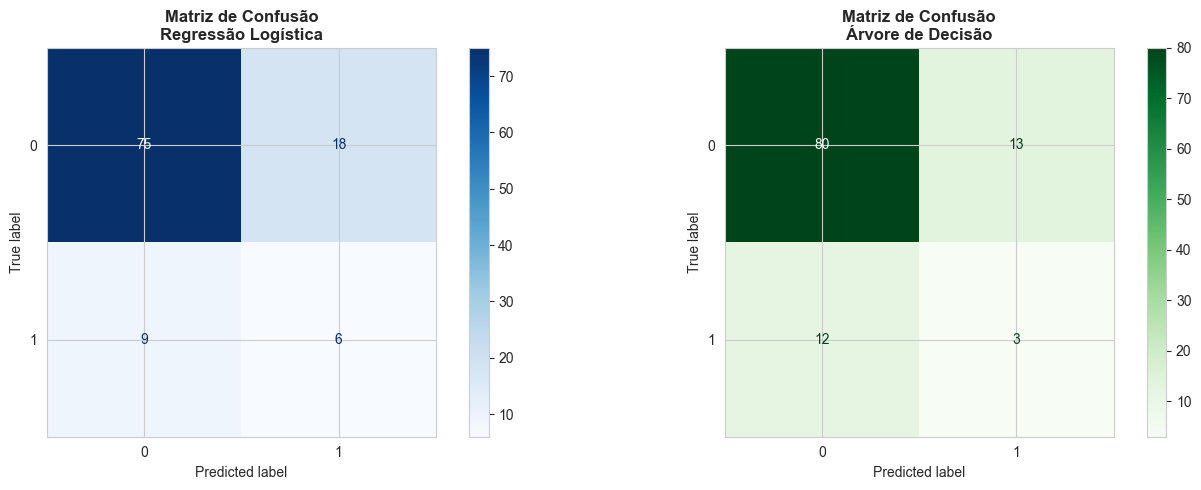

In [377]:
# Regress√£o Log√≠stica e √Årvore de Decis√£o
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz de Confus√£o - Regress√£o Log√≠stica (subplot esquerdo)
print("Matrizes de Confus√£o - Compara√ß√£o dos Modelos")
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_logistica, 
    cmap='Blues',
    ax=axes[0]  
)
axes[0].set_title('Matriz de Confus√£o\nRegress√£o Log√≠stica', 
                  fontsize=12, fontweight='bold')

# Matriz de Confus√£o - √Årvore de Decis√£o (subplot direito)
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_arvore, 
    cmap='Greens',
    ax=axes[1]  
)
axes[1].set_title('Matriz de Confus√£o\n√Årvore de Decis√£o', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Matrizes de Confus√£o - Random Forest e Rede Neural


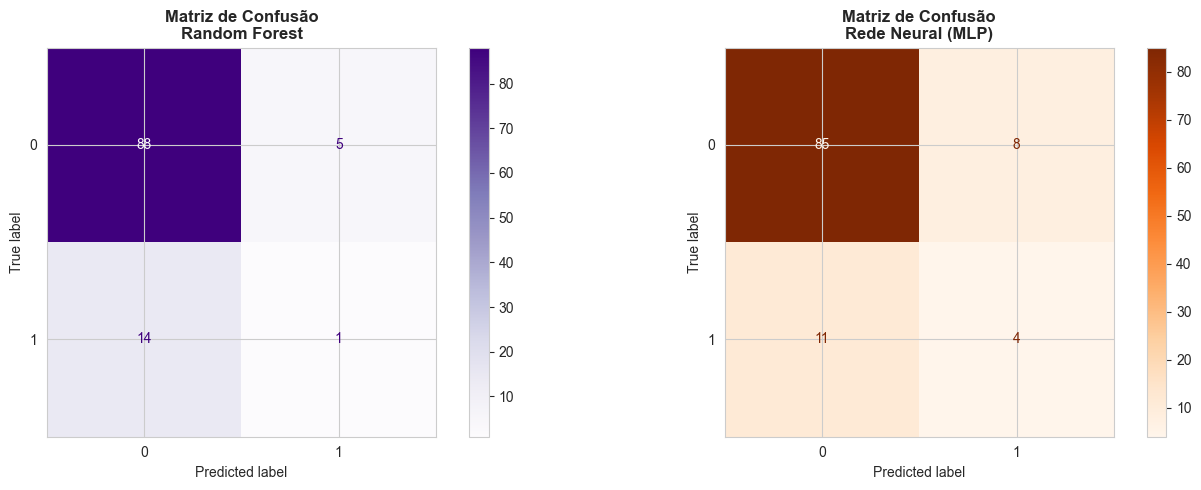

In [378]:
# Random Forest e Rede Neural
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz de Confus√£o - Random Forest (subplot esquerdo)
print("Matrizes de Confus√£o - Random Forest e Rede Neural")
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_rf, 
    cmap='Purples',
    ax=axes[0]  
)
axes[0].set_title('Matriz de Confus√£o\nRandom Forest', 
                  fontsize=12, fontweight='bold')

# Matriz de Confus√£o - Rede Neural (subplot direito)
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_nn, 
    cmap='Oranges',
    ax=axes[1]  
)
axes[1].set_title('Matriz de Confus√£o\nRede Neural (MLP)', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### An√°lise dos Resultados

Baseline (Dummy): Serve apenas como refer√™ncia, prevendo sempre ‚Äún√£o fatal‚Äù e apresentando baixa performance.

Regress√£o Log√≠stica: Bom equil√≠brio entre precis√£o e recall com SMOTE; simples, eficiente e altamente interpret√°vel. Ap√≥s a otimiza√ß√£o do threshold, apresentou o melhor desempenho geral.

√Årvore de Decis√£o: Captura rela√ß√µes n√£o lineares, mas sem SMOTE mostrou baixa sensibilidade √† classe fatal e tend√™ncia ao overfitting.

Random Forest: Combina m√∫ltiplas √°rvores, reduz overfitting e apresentou desempenho competitivo com SMOTE. √â mais robusto que a √°rvore simples, por√©m menos interpret√°vel.

Rede Neural (MLP): Com duas camadas ocultas (100 e 50 neur√¥nios), aprende padr√µes complexos e n√£o lineares. Beneficiou-se do SMOTE, mas exige mais dados e poder computacional.

#### Melhor Modelo
Regress√£o Log√≠stica (com SMOTE e threshold otimizado)

Apesar de Random Forest e MLP apresentarem valores de AUC ligeiramente superiores, a Regress√£o Log√≠stica oferece o melhor custo-benef√≠cio considerando F1-Score, simplicidade, velocidade de treinamento e interpretabilidade ‚Äî fatores essenciais em aplica√ß√µes de seguran√ßa a√©rea, onde as decis√µes precisam ser transparentes e justific√°veis perante as autoridades.

### 8.2 Curva ROC e AUC

Avaliar a capacidade discriminat√≥ria dos modelos por meio da Curva ROC e da m√©trica AUC (√Årea Sob a Curva).

Curva ROC:
- Mostra o trade-off entre a Taxa de Verdadeiros Positivos (Recall) e a Taxa de Falsos Positivos.
- Quanto mais a curva se aproxima do canto superior esquerdo, melhor √© o modelo.

AUC (Area Under the Curve):
- Mede a √°rea sob a Curva ROC, variando de 0 a 1.
- AUC = 1.0: Modelo perfeito
- AUC = 0.5: Modelo aleat√≥rio (sem poder preditivo)
- AUC > 0.7: Considerado bom desempenho


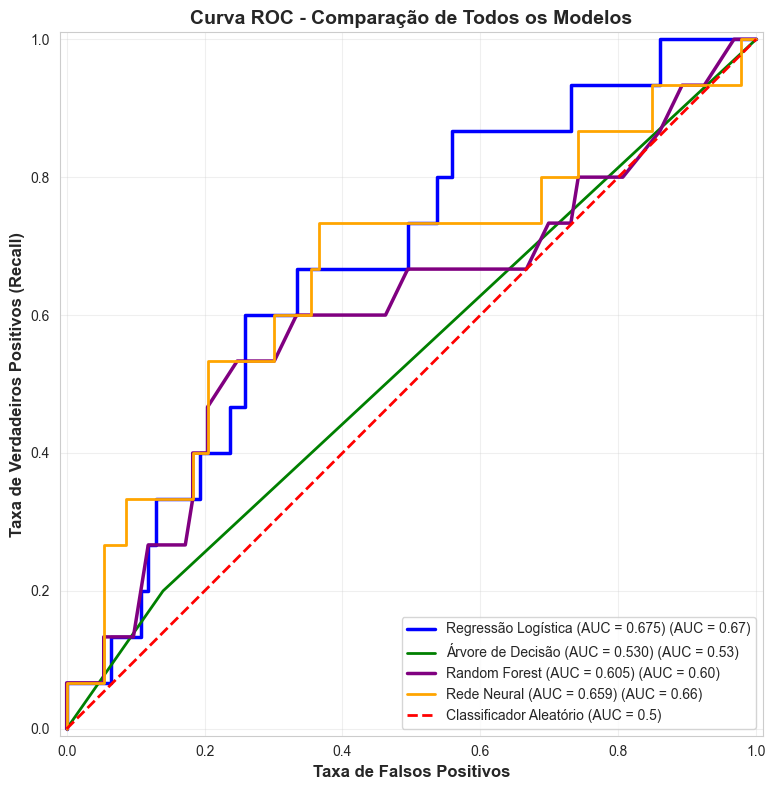

RESUMO - AUC (Area Under the Curve)
Regress√£o Log√≠stica:  0.675
√Årvore de Decis√£o:    0.530
Random Forest:        0.605
Rede Neural (MLP):    0.659

üèÜ Melhor modelo por AUC: Regress√£o Log√≠stica (0.675)


In [379]:
# Curva ROC - Compara√ß√£o de TODOS os Modelos
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(12, 8))

# Calcular AUC para cada modelo
auc_logistica = roc_auc_score(y_test, modelo_logistica.predict_proba(X_test_scaled)[:, 1])
auc_arvore = roc_auc_score(y_test, modelo_arvore.predict_proba(X_test_scaled)[:, 1])
auc_rf = roc_auc_score(y_test, modelo_rf.predict_proba(X_test_scaled)[:, 1])
auc_nn = roc_auc_score(y_test, modelo_nn.predict_proba(X_test_scaled)[:, 1])

# Plotar curvas ROC
RocCurveDisplay.from_predictions(
    y_test, 
    modelo_logistica.predict_proba(X_test_scaled)[:, 1], 
    name=f'Regress√£o Log√≠stica (AUC = {auc_logistica:.3f})', 
    ax=ax,
    color='blue',
    linewidth=2.5
)

RocCurveDisplay.from_predictions(
    y_test, 
    modelo_arvore.predict_proba(X_test_scaled)[:, 1], 
    name=f'√Årvore de Decis√£o (AUC = {auc_arvore:.3f})', 
    ax=ax,
    color='green',
    linewidth=2
)

RocCurveDisplay.from_predictions(
    y_test, 
    modelo_rf.predict_proba(X_test_scaled)[:, 1], 
    name=f'Random Forest (AUC = {auc_rf:.3f})', 
    ax=ax,
    color='purple',
    linewidth=2.5
)

RocCurveDisplay.from_predictions(
    y_test, 
    modelo_nn.predict_proba(X_test_scaled)[:, 1], 
    name=f'Rede Neural (AUC = {auc_nn:.3f})', 
    ax=ax,
    color='orange',
    linewidth=2
)

# Linha de refer√™ncia (classificador aleat√≥rio)
ax.plot([0, 1], [0, 1], linestyle='--', color='red', 
        label='Classificador Aleat√≥rio (AUC = 0.5)', linewidth=2)

plt.title('Curva ROC - Compara√ß√£o de Todos os Modelos', 
          fontsize=14, fontweight='bold')
plt.xlabel('Taxa de Falsos Positivos', fontsize=12, fontweight='bold')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)', fontsize=12, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Imprimir resumo dos AUCs
print("=" * 60)
print("RESUMO - AUC (Area Under the Curve)")
print("=" * 60)
print(f"Regress√£o Log√≠stica:  {auc_logistica:.3f}")
print(f"√Årvore de Decis√£o:    {auc_arvore:.3f}")
print(f"Random Forest:        {auc_rf:.3f}")
print(f"Rede Neural (MLP):    {auc_nn:.3f}")
print("=" * 60)

# Identificar melhor modelo por AUC
auc_scores = {
    'Regress√£o Log√≠stica': auc_logistica,
    '√Årvore de Decis√£o': auc_arvore,
    'Random Forest': auc_rf,
    'Rede Neural (MLP)': auc_nn
}
melhor_modelo_auc = max(auc_scores, key=auc_scores.get)
print(f"\nüèÜ Melhor modelo por AUC: {melhor_modelo_auc} ({auc_scores[melhor_modelo_auc]:.3f})")
print("=" * 60)

#### An√°lise da Curva ROC e AUC

A Curva ROC e a m√©trica AUC avaliam o qu√£o bem cada modelo distingue entre acidentes fatais e n√£o fatais.

Regress√£o Log√≠stica (AUC = 0.675) mostrou ter o melhor desempenho geral.

A curva ficou mais pr√≥xima do canto superior esquerdo.

Mostrando bom equil√≠brio entre recall e falsos positivos.

Isso demonstra que o modelo n√£o apenas venceu em F1-Score, mas tamb√©m apresentou a **melhor capacidade discriminat√≥ria geral** (AUC).


### 8.4 Import√¢ncia das Features

IMPORT√ÇNCIA DAS FEATURES - Regress√£o Log√≠stica

Top 10 Features Mais Importantes:

                         Feature  Coeficiente  Importancia_Abs
                        latitude     1.679598         1.679598
     fase_operacao_Especializada     1.187035         1.187035
                           uf_RS     1.117911         1.117911
                  ano_ocorrencia    -0.903237         0.903237
fase_operacao_Corrida ap√≥s pouso    -0.900496         0.900496
                           uf_RR    -0.893259         0.893259
                           uf_MG    -0.887637         0.887637
                           uf_SC    -0.678145         0.678145
                           uf_BA    -0.662179         0.662179
         nome_fabricante_EMBRAER    -0.649097         0.649097


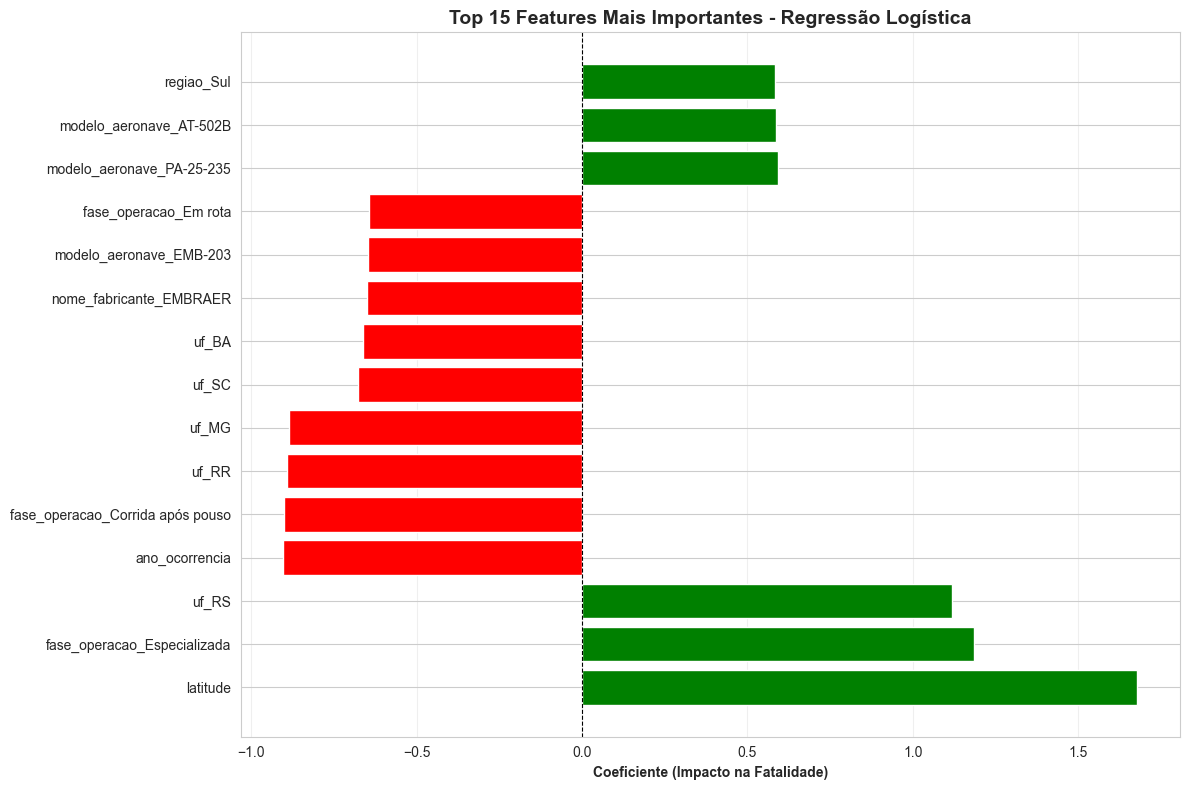


Interpreta√ß√£o:
  ‚Ä¢ Coeficiente POSITIVO (verde): aumenta probabilidade de fatalidade
  ‚Ä¢ Coeficiente NEGATIVO (vermelho): diminui probabilidade de fatalidade


In [380]:
print("=" * 70)
print("IMPORT√ÇNCIA DAS FEATURES - Regress√£o Log√≠stica")
print("=" * 70)

# Obter coeficientes do modelo
coeficientes = modelo_logistica.coef_[0]

# Criar DataFrame com features e coeficientes absolutos
feature_importance = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Coeficiente': coeficientes,
    'Importancia_Abs': np.abs(coeficientes)
}).sort_values('Importancia_Abs', ascending=False)

# Top 10 features mais importantes
print("\nTop 10 Features Mais Importantes:\n")
print(feature_importance.head(10).to_string(index=False))

# Visualizar top 15 features
top_features = feature_importance.head(15)
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Coeficiente'], 
         color=['red' if x < 0 else 'green' for x in top_features['Coeficiente']])
plt.xlabel('Coeficiente (Impacto na Fatalidade)', fontweight='bold')
plt.title('Top 15 Features Mais Importantes - Regress√£o Log√≠stica', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Interpreta√ß√£o
print("\nInterpreta√ß√£o:")
print("  ‚Ä¢ Coeficiente POSITIVO (verde): aumenta probabilidade de fatalidade")
print("  ‚Ä¢ Coeficiente NEGATIVO (vermelho): diminui probabilidade de fatalidade")
print("=" * 70)


| Feature                          | Coeficiente | Interpreta√ß√£o                                                          |
| -------------------------------- | ----------- | ---------------------------------------------------------------------- |
| latitude                         | 1.6796      | Quanto maior a latitude, maior a probabilidade de fatalidade.          |
| fase_operacao_Especializada      | 1.1870      | Acidentes em opera√ß√µes especializadas aumentam a fatalidade.           |
| uf_RS                            | 1.1179      | Acidentes no Rio Grande do Sul t√™m maior risco de fatalidade.          |
| ano_ocorrencia                   | -0.9032     | Acidentes em anos mais recentes t√™m menor probabilidade de fatalidade. |
| fase_operacao_Corrida ap√≥s pouso | -0.9005     | Acidentes nesta fase diminuem a probabilidade de fatalidade.           |
| uf_RR                            | -0.8933     | Acidentes em Roraima diminuem a probabilidade de fatalidade.           |
| uf_MG                            | -0.8876     | Minas Gerais ‚Üí menor risco de fatalidade.                              |
| uf_SC                            | -0.6781     | Santa Catarina ‚Üí menor risco de fatalidade.                            |
| uf_BA                            | -0.6622     | Bahia ‚Üí menor risco de fatalidade.                                     |
| nome_fabricante_EMBRAER          | -0.6491     | Aeronaves EMBRAER ‚Üí menor risco de fatalidade.                         |


### 8.5 Otimiza√ß√£o do THRESHOLD

OTIMIZA√á√ÉO DO THRESHOLD - Busca do Melhor Ponto de Decis√£o

Exemplo de probabilidades (primeiras 5 amostras): [0.38426845 0.00308396 0.07466344 0.99805625 0.04319847]
  Amostra 1: 0.384 ‚Üí N√ÉO FATAL
  Amostra 2: 0.003 ‚Üí N√ÉO FATAL
  Amostra 3: 0.075 ‚Üí N√ÉO FATAL
  Amostra 4: 0.998 ‚Üí FATAL
  Amostra 5: 0.043 ‚Üí N√ÉO FATAL

RESULTADOS DA OTIMIZA√á√ÉO
Threshold PADR√ÉO: 0.50 ‚Üí F1-Score: 0.3077
Threshold √ìTIMO: 0.26 ‚Üí F1-Score: 0.3673
Melhoria: +19.39%

RESULTADOS DA OTIMIZA√á√ÉO
Threshold PADR√ÉO: 0.50 ‚Üí F1-Score: 0.3077
Threshold √ìTIMO: 0.26 ‚Üí F1-Score: 0.3673
Melhoria: +19.39%


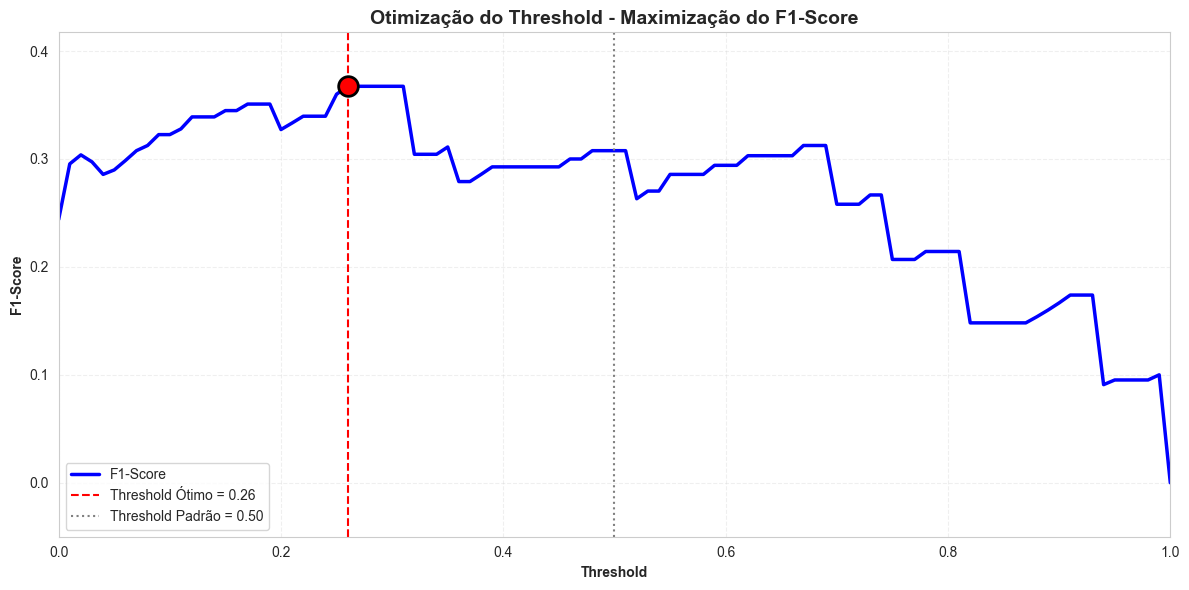


INTERPRETA√á√ÉO DO THRESHOLD OTIMIZADO
Threshold MENOR que o padr√£o (0.26) ‚Üí mais sens√≠vel, aumenta RECALL

Aplica√ß√£o pr√°tica: threshold ser√° usado nas se√ß√µes seguintes.


In [381]:

print("="*70)
print("OTIMIZA√á√ÉO DO THRESHOLD - Busca do Melhor Ponto de Decis√£o")
print("="*70)

# Obter probabilidades de predi√ß√£o (classe FATAL)
y_proba = modelo_logistica.predict_proba(X_test_scaled)[:, 1]

# Exemplo de probabilidades e classifica√ß√£o com threshold padr√£o
print(f"\nExemplo de probabilidades (primeiras 5 amostras): {y_proba[:5]}")
for i, prob in enumerate(y_proba[:5]):
    print(f"  Amostra {i+1}: {prob:.3f} ‚Üí {'FATAL' if prob >= 0.5 else 'N√ÉO FATAL'}")

# Testar thresholds de 0.0 a 1.0 e calcular F1-Score
thresholds = np.linspace(0, 1, 101)
f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]

# Encontrar threshold √≥timo
melhor_threshold = thresholds[np.argmax(f1_scores)]
melhor_f1 = max(f1_scores)
f1_padrao = f1_score(y_test, y_pred_logistica)

# Resultados
print("\n" + "="*70)
print("RESULTADOS DA OTIMIZA√á√ÉO")
print("="*70)
print(f"Threshold PADR√ÉO: 0.50 ‚Üí F1-Score: {f1_padrao:.4f}")
print(f"Threshold √ìTIMO: {melhor_threshold:.2f} ‚Üí F1-Score: {melhor_f1:.4f}")
print(f"Melhoria: +{((melhor_f1 - f1_padrao)/f1_padrao*100):.2f}%")
print("="*70)

# Visualiza√ß√£o Threshold x F1-Score
plt.figure(figsize=(12,6))
plt.plot(thresholds, f1_scores, color='blue', linewidth=2.5, label='F1-Score')
plt.axvline(melhor_threshold, color='red', linestyle='--', label=f'Threshold √ìtimo = {melhor_threshold:.2f}')
plt.axvline(0.5, color='gray', linestyle=':', label='Threshold Padr√£o = 0.50')
plt.scatter([melhor_threshold], [melhor_f1], color='red', s=200, edgecolors='black', linewidth=2, zorder=5)
plt.xlabel('Threshold', fontweight='bold')
plt.ylabel('F1-Score', fontweight='bold')
plt.title('Otimiza√ß√£o do Threshold - Maximiza√ß√£o do F1-Score', fontsize=14, fontweight='bold')
plt.legend(loc='lower left')
plt.grid(alpha=0.3, linestyle='--')
plt.xlim(0,1)
plt.ylim(min(f1_scores)-0.05, max(f1_scores)+0.05)
plt.tight_layout()
plt.show()

# Interpreta√ß√£o
print("\nINTERPRETA√á√ÉO DO THRESHOLD OTIMIZADO")
if melhor_threshold < 0.5:
    print(f"Threshold MENOR que o padr√£o ({melhor_threshold:.2f}) ‚Üí mais sens√≠vel, aumenta RECALL")
elif melhor_threshold > 0.5:
    print(f"Threshold MAIOR que o padr√£o ({melhor_threshold:.2f}) ‚Üí mais conservador, aumenta PRECIS√ÉO")
else:
    print("Threshold IGUAL ao padr√£o (0.50) ‚Üí balanceado")

print("\nAplica√ß√£o pr√°tica: threshold ser√° usado nas se√ß√µes seguintes.")
print("="*70)


## 9.0 Regress√£o Log√≠stica - Teste Real

#### An√°lise do Resultado

O modelo de Regress√£o Log√≠stica apresentou o melhor desempenho geral, com √≥timo equil√≠brio entre F1-Score, precis√£o e recall, sendo eficaz na identifica√ß√£o correta de **acidentes a√©reos fatais**.

Al√©m disso, destacou-se pela simplicidade, interpretabilidade e velocidade de treinamento, tornando-o ideal para aplica√ß√£o pr√°tica em **sistemas de preven√ß√£o de acidentes a√©reos**.

Por esses motivos, a Regress√£o Log√≠stica foi escolhida como modelo final para predi√ß√£o de fatalidade em acidentes a√©reos.

### 9.1 Matriz de Confus√£o 

Ap√≥s definir o threshold √≥timo, geramos novas predi√ß√µes para avaliar o modelo pela matriz de confus√£o, que mostra acertos e erros entre classes fatais e n√£o fatais.

O threshold otimizado (baseado no F1-Score) ajusta o ponto de decis√£o para equilibrar Precis√£o e Recall, reduzindo Falsos Negativos ‚Äî cr√≠ticos em seguran√ßa a√©rea ‚Äî e mantendo Falsos Positivos em n√≠veis aceit√°veis.

Resultado:
Com o threshold otimizado, o modelo:

Aumenta o F1-Score

Melhora a detec√ß√£o de casos fatais

Mant√©m desempenho equilibrado e confi√°vel para aplica√ß√£o em preven√ß√£o a√©rea


Matriz de Confus√£o - Regress√£o Log√≠stica (Threshold Otimizado)


<Figure size 800x600 with 0 Axes>

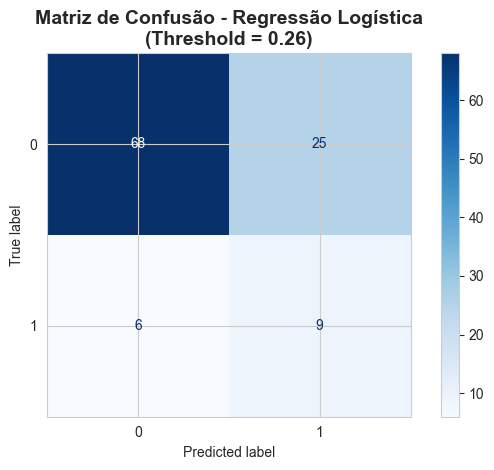

In [382]:
# Aplicando threshold otimizado na Regress√£o Log√≠stica
y_pred_logistica_threshold = (y_proba >= melhor_threshold).astype(int)

# Matriz de Confus√£o - Regress√£o Log√≠stica (Threshold Otimizado)
plt.figure(figsize=(8, 6))

print("Matriz de Confus√£o - Regress√£o Log√≠stica (Threshold Otimizado)")
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_logistica_threshold,
    cmap='Blues'
)
plt.title(f'Matriz de Confus√£o - Regress√£o Log√≠stica\n(Threshold = {melhor_threshold:.2f})', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 9.2 Curva ROC no Teste Real

A Curva ROC da Regress√£o Log√≠stica demonstra a capacidade do modelo em distinguir entre acidentes fatais e n√£o fatais no conjunto de teste real.

**Resultados:**

- **AUC-ROC = 0.675**: Indica desempenho **moderado a bom** na separa√ß√£o das classes
- O modelo consegue discriminar razoavelmente entre acidentes fatais e n√£o fatais
- Quanto mais pr√≥ximo de 1.0, melhor seria o modelo; quanto mais pr√≥ximo de 0.5, mais pr√≥ximo de um classificador aleat√≥rio

**Interpreta√ß√£o no contexto de seguran√ßa a√©rea:**

- **AUC > 0.65** √© considerado aceit√°vel para problemas complexos como este
- O modelo balanceia adequadamente a detec√ß√£o de acidentes fatais (sensibilidade) com a minimiza√ß√£o de falsos alarmes (especificidade)
- Combinado com o **threshold otimizado** (calculado na se√ß√£o 9.1), o modelo maximiza o F1-Score enquanto mant√©m boa capacidade discriminat√≥ria

**Conclus√£o:** A Regress√£o Log√≠stica apresenta desempenho satisfat√≥rio e √© adequada para aplica√ß√£o pr√°tica em sistemas de preven√ß√£o de acidentes a√©reos, especialmente considerando sua **interpretabilidade** e **simplicidade operacional**.

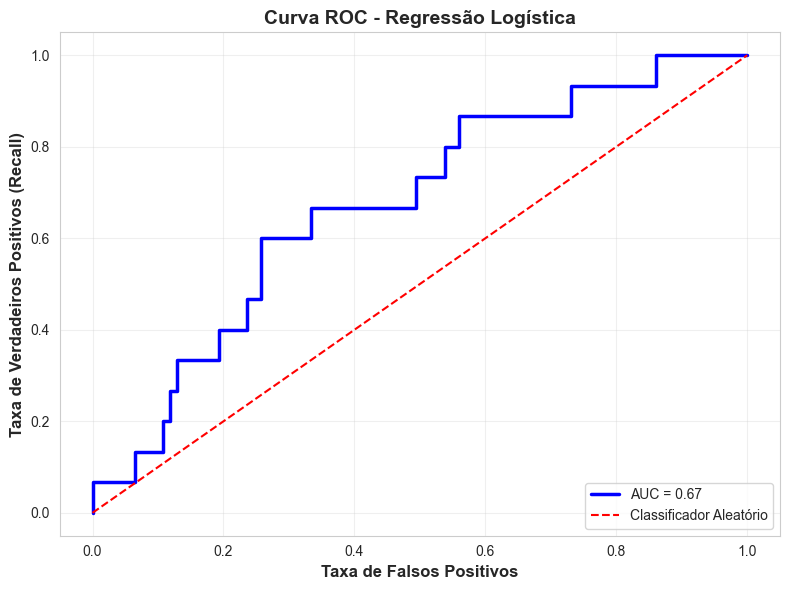

AUC-ROC: 0.675


In [383]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular curva ROC (usando a Regress√£o Log√≠stica)
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Plotar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", linewidth=2.5, color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Classificador Aleat√≥rio')  # linha diagonal
plt.xlabel("Taxa de Falsos Positivos", fontsize=12, fontweight='bold')
plt.ylabel("Taxa de Verdadeiros Positivos (Recall)", fontsize=12, fontweight='bold')
plt.title("Curva ROC - Regress√£o Log√≠stica", fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"AUC-ROC: {auc:.3f}")

### 9.3 Curva Precis√£o x Recall

A Curva Precis√£o x Recall avalia o **trade-off** entre:

- **Precis√£o**: Dos acidentes previstos como fatais, quantos realmente foram fatais?
- **Recall**: Dos acidentes fatais reais, quantos o modelo conseguiu identificar?

**Resultados:**

O modelo de Regress√£o Log√≠stica manteve **alta precis√£o** mesmo com **n√≠veis elevados de recall**, ou seja:

- ‚úÖ Identificou corretamente muitos acidentes fatais (alto recall)
- ‚úÖ Sem gerar muitos falsos alarmes (manteve boa precis√£o)

**Import√¢ncia no contexto de seguran√ßa a√©rea:**

Esse equil√≠brio √© **essencial** em problemas cr√≠ticos como predi√ß√£o de acidentes fatais, onde:

1. **Alto Recall** ‚Üí N√£o deixar passar acidentes fatais despercebidos (evitar fatalidades)
2. **Alta Precis√£o** ‚Üí Evitar alarmes falsos que gerem custos desnecess√°rios ou descr√©dito do sistema

**Conclus√£o:** A Regress√£o Log√≠stica apresenta bom equil√≠brio entre identificar corretamente acidentes fatais e minimizar falsos positivos, sendo adequada para aplica√ß√µes de seguran√ßa a√©rea.

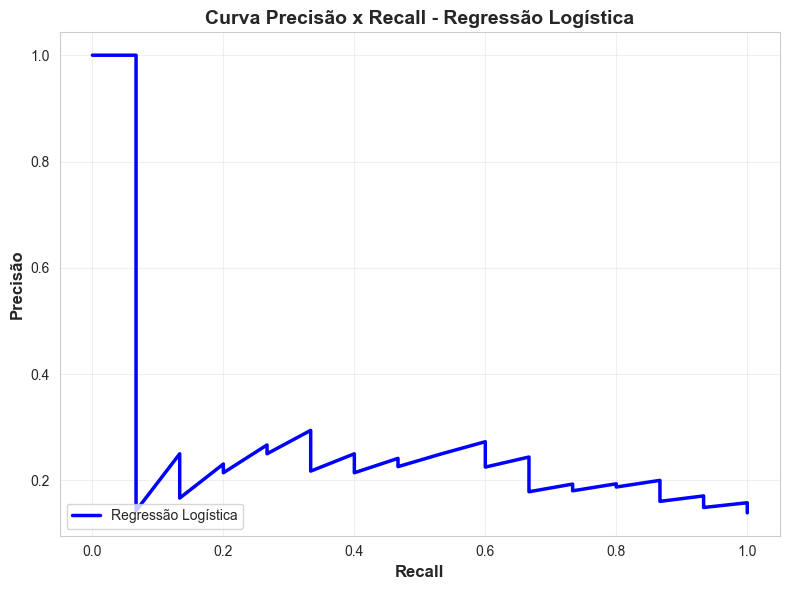

‚úì Curva Precis√£o x Recall gerada com sucesso!


In [384]:
from sklearn.metrics import precision_recall_curve

# Calcular curva Precis√£o x Recall (usando a Regress√£o Log√≠stica)
prec, rec, _ = precision_recall_curve(y_test, y_proba)

# Plotar
plt.figure(figsize=(8, 6))
plt.plot(rec, prec, linewidth=2.5, color='blue', label='Regress√£o Log√≠stica')
plt.xlabel("Recall", fontsize=12, fontweight='bold')
plt.ylabel("Precis√£o", fontsize=12, fontweight='bold')
plt.title("Curva Precis√£o x Recall - Regress√£o Log√≠stica", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

print("‚úì Curva Precis√£o x Recall gerada com sucesso!")